*Grupo 4*
* Alex Riquelme
* Camila Aguilar
* Camila Varas
* Fabian Cuevas
* Claudia Araya



Suponemos que el conjunto de datos se genera a partir de diferentes distribuciones multivariantes gaussianas.

In [ ]:
import warnings
warnings.filterwarnings('ignore')

### Plots
%matplotlib inline
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
bounds = np.linspace(-1, 3, 10)
normcolor = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
##########
from scipy.stats import multivariate_normal as mvnorm
from scipy.stats import norm

Primero fijamos los valores medios y las matrices de covarianza correspondientes a cada clase, así como sus etiquetas. Actualmente se seleccionan tres valores medios para el conjunto de datos.

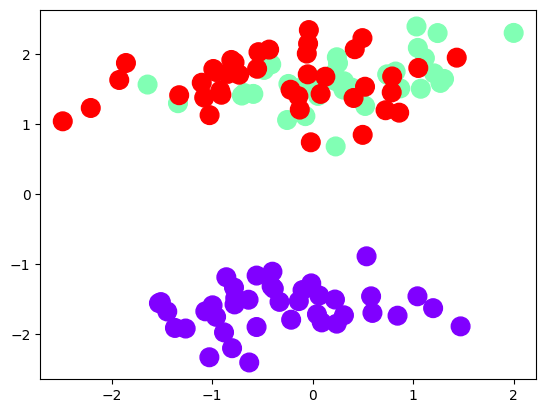

In [ ]:
# Ambient dimension
p=2
# Number of elements in each class
n1=40
n2=40
n3=40
#### Labels
color=np.concatenate((0*np.ones(n1,),1*np.ones(n2,),2*np.ones(n3,)),
                     axis=0)[np.newaxis]
#### Mean values
# Either random
m1=norm.rvs(0,1,size=(p,))
m2=norm.rvs(0,1,size=(p,))
m3=norm.rvs(0,1,size=(p,))
# Or fixed
#m1= [1,2]
#m2=[-2,-1]
#m3=[-2,3]
#### Covariance matrix
temp= norm.rvs(0, 0.5, size=(p, p))
Sigma1 =  temp.T@temp
Sigma2 = Sigma1
Sigma3 = Sigma1
#### Generate data
X1=mvnorm.rvs(m1, Sigma1, size=(n1, 1))
X2=mvnorm.rvs(m2, Sigma2, size=(n2, 1))
X3=mvnorm.rvs(m3, Sigma3, size=(n3, 1))
#### Build the dataset
X=np.concatenate((X1,X2,X3),axis=0)
Xlabeled=np.concatenate((X,color.T),axis=1)
xbar1=np.mean(X1,0)
xbar2=np.mean(X2,0)
xbar3=np.mean(X3,0)
xmean1=(xbar1+xbar2)/2
xmean2=(xbar1+xbar3)/2
xmean3=(xbar2+xbar3)/2
## Plot
fig = plt.figure()
plt.scatter(X[:,0], X[:,1], s=180, c=color, cmap=plt.cm.rainbow)
plt.show()

Ahora los datos están listos para su procesamiento posterior.

Primero preparamos el conjunto de datos.

In [ ]:
X12=np.concatenate((X1,X2),axis=0)
y12=np.concatenate((0*np.ones(n1,),1*np.ones(n2,)),axis=0)[np.newaxis]

Antes de continuar, Use la siguiente matriz $\mathbf E_n$ para simplificar todo el proceso.

In [ ]:
#### Centering Matrix
def centering(n):
    return np.eye(n)-np.ones((n,n))/n


Obtenga la función LDA de Fisher

In [ ]:
# Centered data
X_mean = np.mean(X, axis=0)
X_centered = X - X_mean

# Within-class scatter matrix Sw
Sw = np.dot(X_centered.T, X_centered)

# Between-class scatter matrix Sb
mu1 = np.mean(X1, axis=0)
mu2 = np.mean(X2, axis=0)
mu3 = np.mean(X3, axis=0)
m_total = np.mean([mu1, mu2, mu3], axis=0)

Sb = n1 * np.outer((mu1 - m_total), (mu1 - m_total)) + \
     n2 * np.outer((mu2 - m_total), (mu2 - m_total)) + \
     n3 * np.outer((mu3 - m_total), (mu3 - m_total))

# Solve the generalized eigenvalue problem
eigenvalues, eigenvectors = np.linalg.eig(np.linalg.inv(Sw) @ Sb)

# Sort eigenvalues and corresponding eigenvectors
idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

# Choose the first (p-1) eigenvectors to project onto
W_lda = eigenvectors[:, :p-1]

# Project the data onto the LDA space
X_lda = X_centered @ W_lda

# Plot
plt.scatter(X_lda[:, 0], X_lda[:, 1], s=180, c=color, cmap=plt.cm.rainbow)
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.title('LDA Projection')
plt.show()


Implementación de la función análisis de discriminante


Obtenga resultado, agregue un gráfico y comente


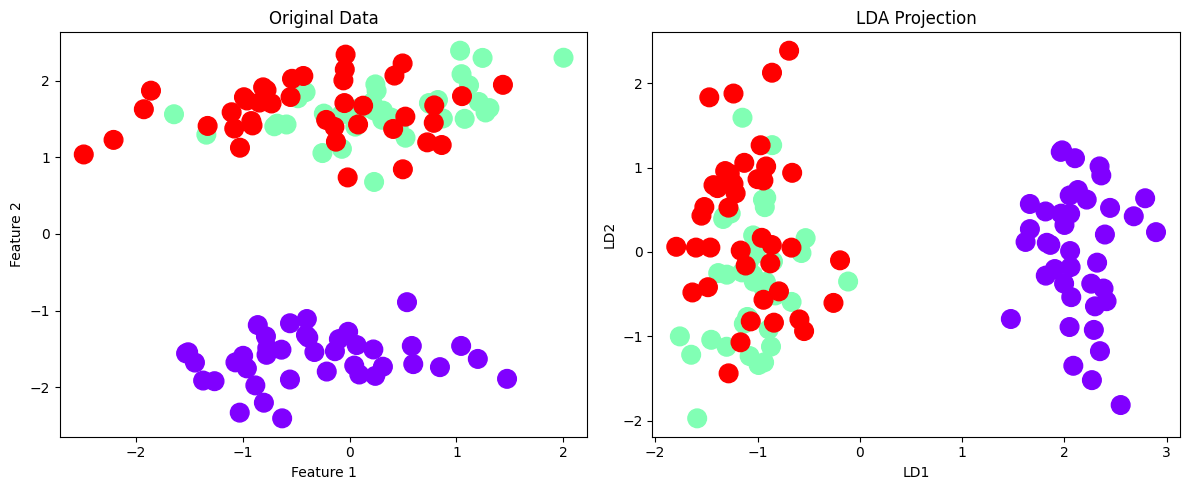

In [ ]:
# Centered data
X_mean = np.mean(X, axis=0)
X_centered = X - X_mean

# Within-class scatter matrix Sw
Sw = np.dot(X_centered.T, X_centered)

# Between-class scatter matrix Sb
mu1 = np.mean(X1, axis=0)
mu2 = np.mean(X2, axis=0)
mu3 = np.mean(X3, axis=0)
m_total = np.mean([mu1, mu2, mu3], axis=0)

Sb = n1 * np.outer((mu1 - m_total), (mu1 - m_total)) + \
     n2 * np.outer((mu2 - m_total), (mu2 - m_total)) + \
     n3 * np.outer((mu3 - m_total), (mu3 - m_total))

# Solve the generalized eigenvalue problem
eigenvalues, eigenvectors = np.linalg.eig(np.linalg.inv(Sw) @ Sb)

# Sort eigenvalues and corresponding eigenvectors
idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]



######################################################
# Choose the first (p-1) eigenvectors to project onto
W_lda = eigenvectors[:, :2]  # Seleccionamos las dos primeras columnas para la proyección

# Project the data onto the LDA space
X_lda = X_centered @ W_lda

# Plot original data
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], s=180, c=color, cmap=plt.cm.rainbow)
plt.title('Original Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Plot LDA projection
plt.subplot(1, 2, 2)
plt.scatter(X_lda[:, 0], X_lda[:, 1], s=180, c=color, cmap=plt.cm.rainbow)
plt.title('LDA Projection')
plt.xlabel('LD1')
plt.ylabel('LD2')

plt.tight_layout()
plt.show()



## K-Means

1.	Reanalice su datos y obtenga 2 y 3 cluster.
2.	Concluya lo obtenido y grafique lo pedido en 1.

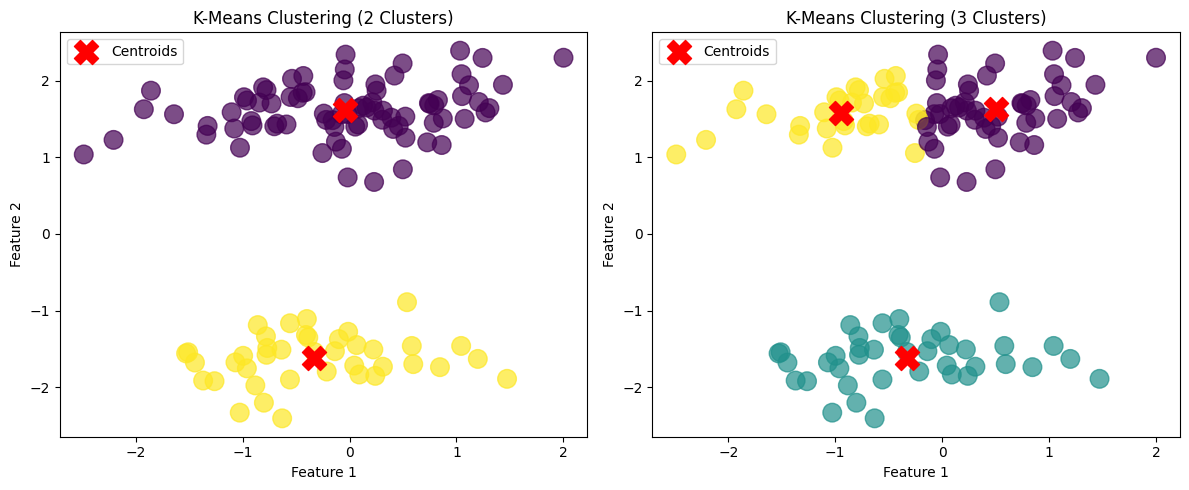

In [ ]:
from sklearn.cluster import KMeans

# Definir el número de clusters
num_clusters_2 = 2
num_clusters_3 = 3

# Aplicar K-Means con 2 y 3 clusters
kmeans_2 = KMeans(n_clusters=num_clusters_2, random_state=42)
kmeans_3 = KMeans(n_clusters=num_clusters_3, random_state=42)

# Ajustar el modelo a los datos
kmeans_2.fit(X)
kmeans_3.fit(X)

# Obtener las etiquetas de los clusters
labels_2 = kmeans_2.labels_
labels_3 = kmeans_3.labels_

# Obtener los centroides de los clusters
centroids_2 = kmeans_2.cluster_centers_
centroids_3 = kmeans_3.cluster_centers_

# Graficar los resultados
plt.figure(figsize=(12, 5))

# Gráfico con 2 clusters
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=labels_2, cmap='viridis', s=180, alpha=0.7)
plt.scatter(centroids_2[:, 0], centroids_2[:, 1], marker='X', c='red', s=300, label='Centroids')
plt.title('K-Means Clustering (2 Clusters)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

# Gráfico con 3 clusters
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=labels_3, cmap='viridis', s=180, alpha=0.7)
plt.scatter(centroids_3[:, 0], centroids_3[:, 1], marker='X', c='red', s=300, label='Centroids')
plt.title('K-Means Clustering (3 Clusters)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

plt.tight_layout()
plt.show()
